In [2]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


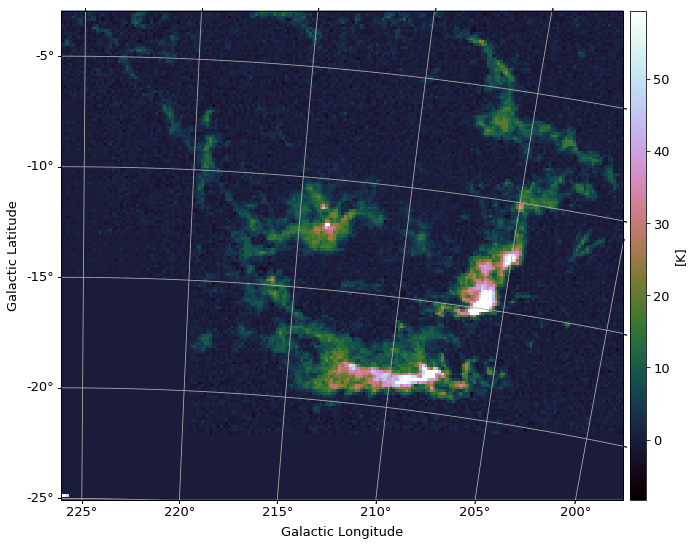

In [3]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/images/Orion.cont.image.fits'
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

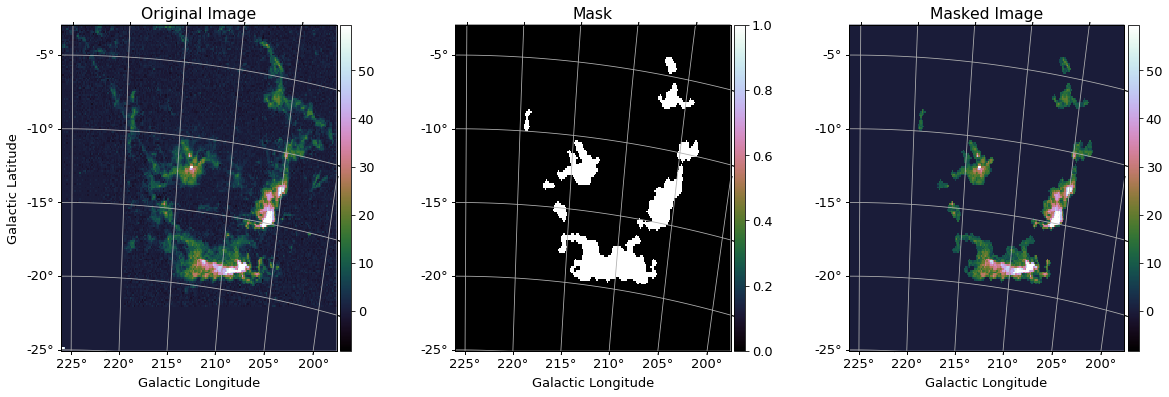

back_level:  6.833755925097559


In [4]:
preprocessing(data, wcs)

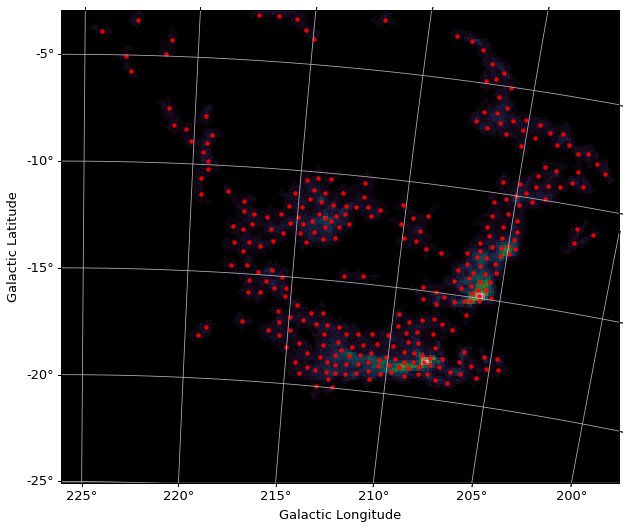

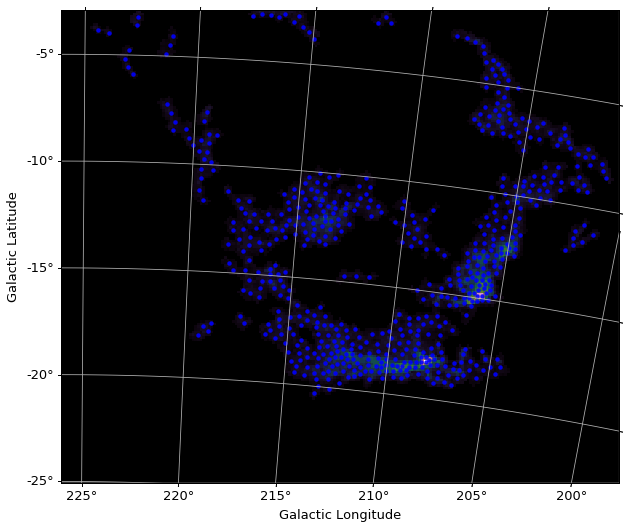

In [5]:
hdmc = HDMClouds(data, back_level=1.00798, wcs=wcs, verbose=True, n_center=300)

In [5]:
hds.build_gmr()


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200106

Residual stats:
Residual RMS: 0.021702438930360095
Residual Variance: 0.0004507600611735143
Flux Lost: 0.12538398187759003
Flux Addition: 0.06435612595208308
Exceeded Pixels: 2682
Total elapsed time: 2250.511661052704 [s]


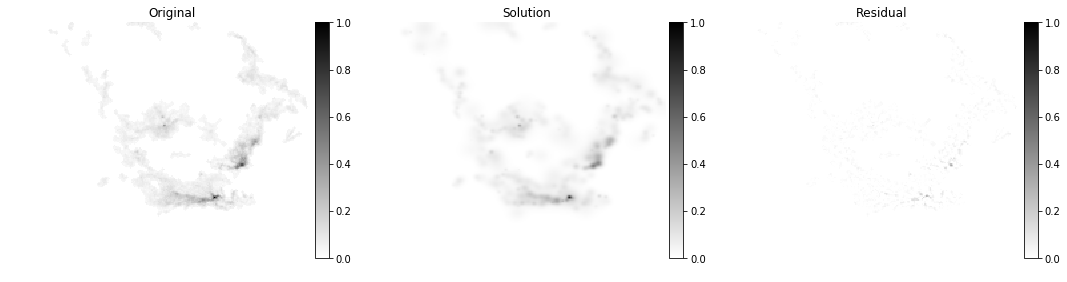

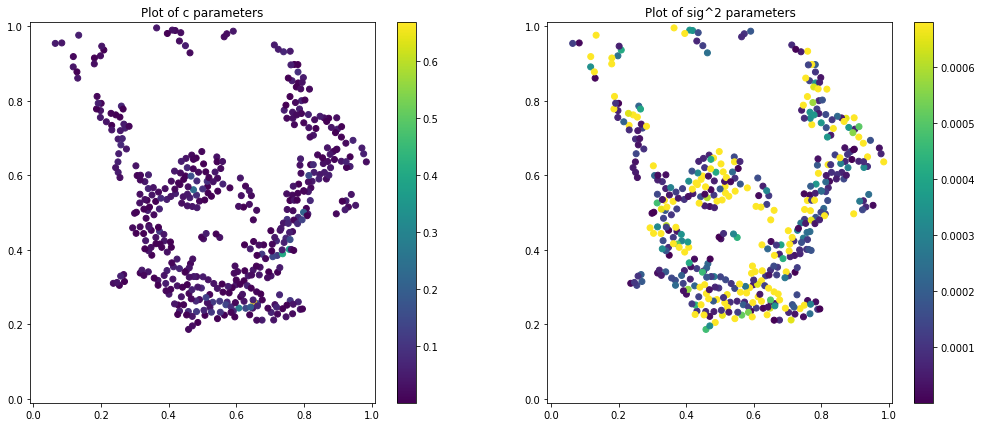

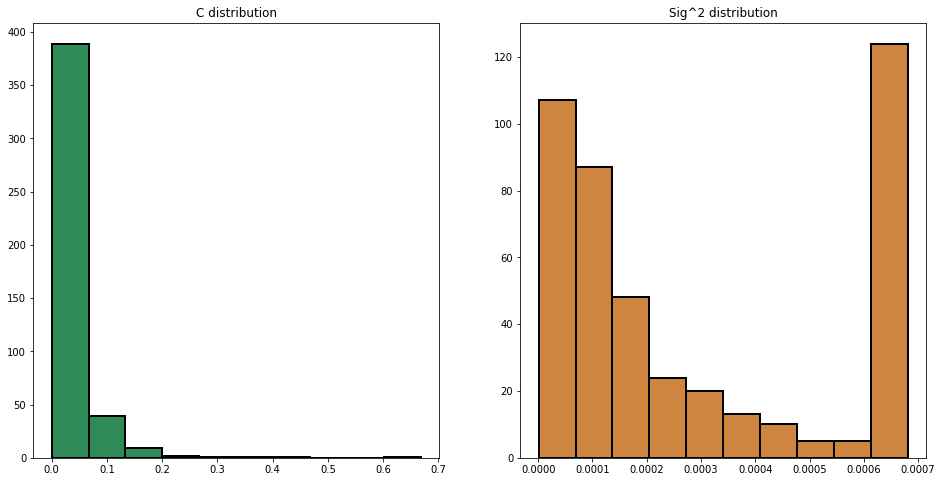

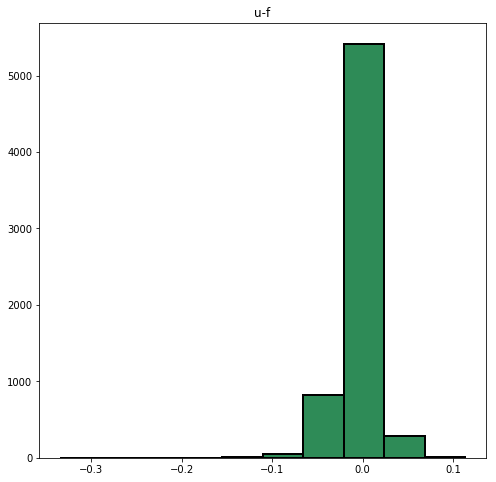

In [6]:
hds.summarize()

In [7]:
xc, yc, c, sig = hds.get_params_mapped()
mu = np.vstack([xc,yc]).T

In [8]:
sd, htree = gaussian_reduction(c, mu, sig, 1)

Merged components 158 and 221 with 6.024383763086476e-07 KL dist and 2.1798830373166017e-12 ISD dist
Merged components 137 and 223 with 2.8860440671151904e-06 KL dist and 2.4531200760514495e-10 ISD dist
Merged components 199 and 331 with 3.1045158992784594e-06 KL dist and 1.6427125935566944e-10 ISD dist
Merged components 183 and 417 with 3.1180889458290884e-06 KL dist and 6.680681563508983e-10 ISD dist
Merged components 207 and 380 with 4.9525748812279786e-06 KL dist and 4.658417157965257e-12 ISD dist
Merged components 113 and 294 with 5.783594191019401e-06 KL dist and 1.3538010296132441e-09 ISD dist
Merged components 265 and 408 with 6.131956941487273e-06 KL dist and 3.409011045101554e-10 ISD dist
Merged components 28 and 204 with 8.819437999402967e-06 KL dist and 2.2949729562412936e-08 ISD dist
Merged components 236 and 288 with 9.548013299054414e-06 KL dist and 5.413932756964668e-10 ISD dist
Merged components 274 and 326 with 1.3064016899488017e-05 KL dist and 2.5410228365885246e-09

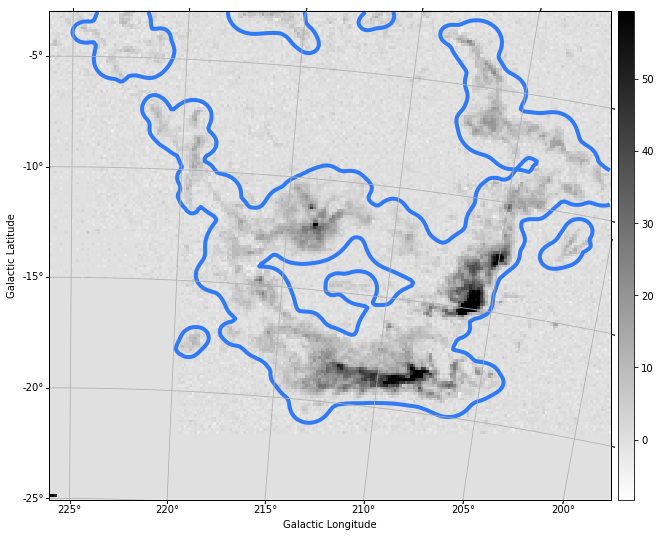

In [52]:
structs_plot(hds, [sd[884]], wcs=wcs)

In [53]:
htree[884]

(882, 883)

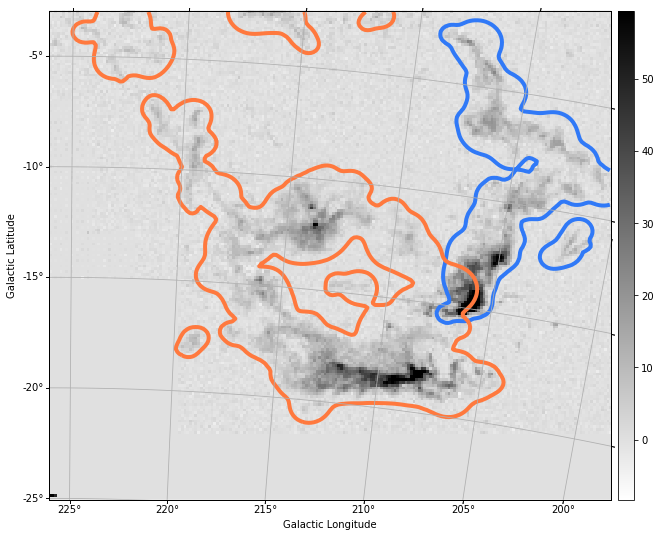

In [54]:
structs_plot(hds, [sd[882], sd[883]], wcs=wcs)

In [55]:
htree[882]

(875, 878)

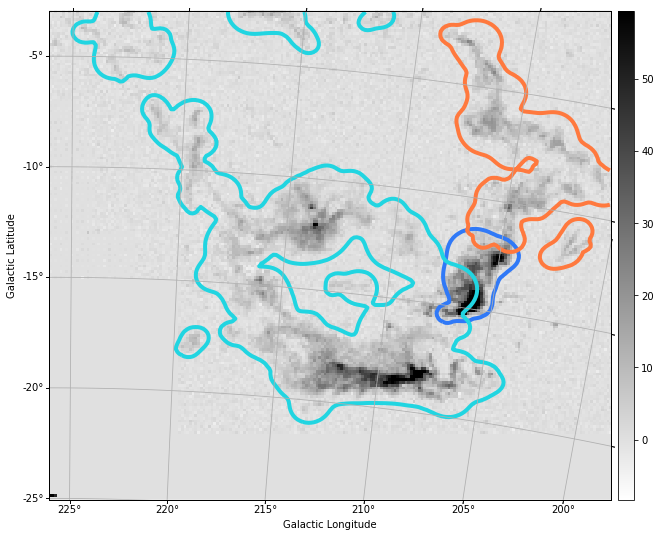

In [56]:
structs_plot(hds, [sd[875], sd[878], sd[883]], wcs=wcs)

In [57]:
htree[883]

(880, 881)

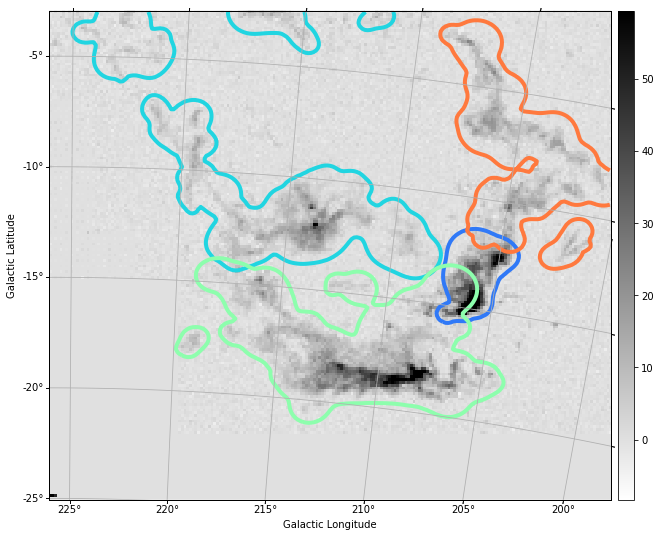

In [58]:
structs_plot(hds, [sd[875], sd[878], sd[880], sd[881]], wcs=wcs)

In [59]:
htree[880]

(874, 877)

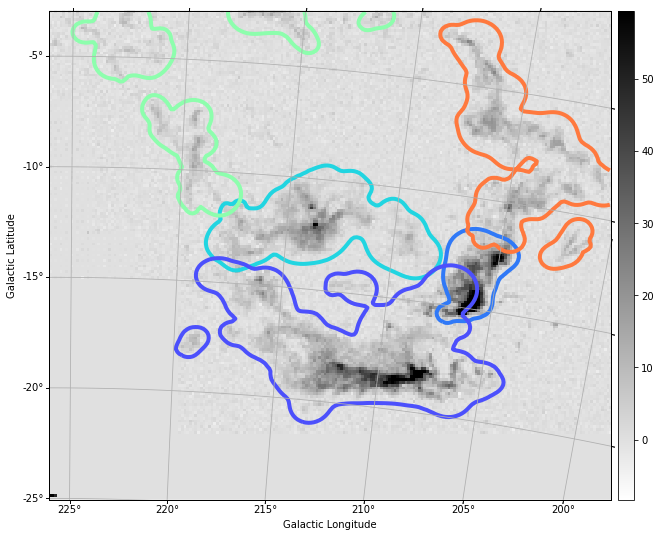

In [60]:
structs_plot(hds, [sd[875], sd[878], sd[874], sd[877], sd[881]], wcs=wcs)

In [61]:
htree[878]

(866, 873)

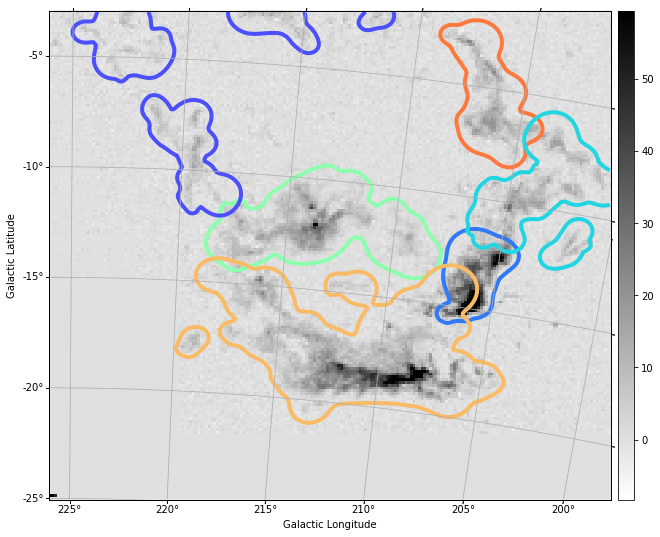

In [62]:
structs_plot(hds, [sd[875], sd[866], sd[873], sd[874], sd[877], sd[881]], wcs=wcs)

In [63]:
htree[877]

(857, 862)

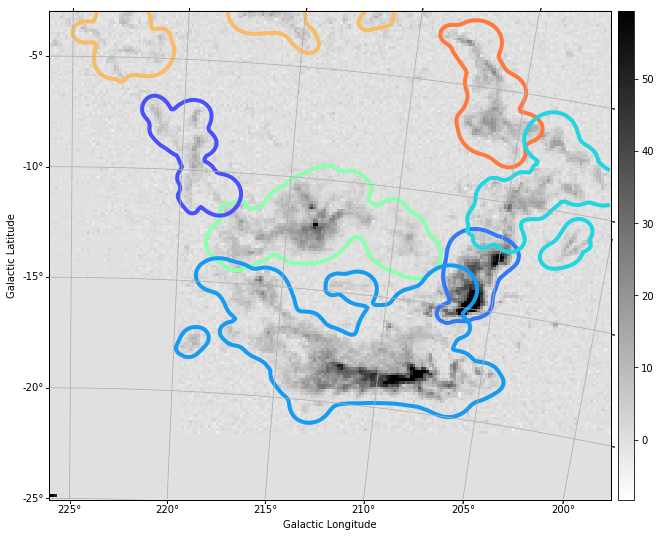

In [64]:
structs_plot(hds, [sd[875], sd[866], sd[873], sd[874], sd[857], sd[862], sd[881]], wcs=wcs)

In [65]:
htree[875]

(859, 865)

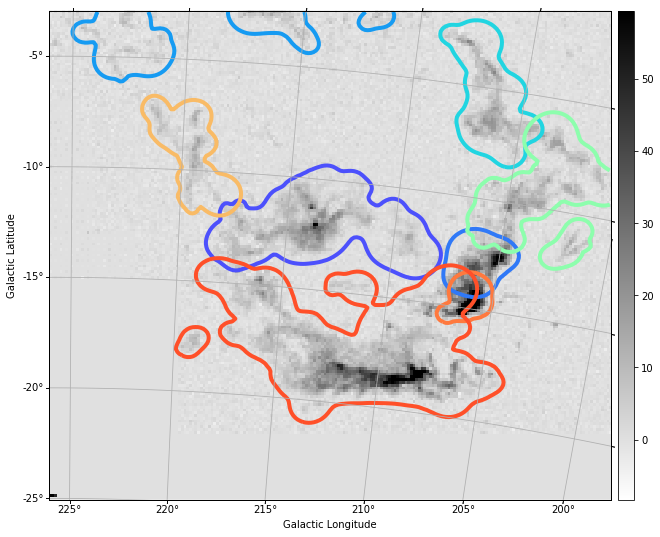

In [66]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[873], sd[874], sd[857], sd[862], sd[881]], wcs=wcs)

In [67]:
htree[874]

(854, 872)

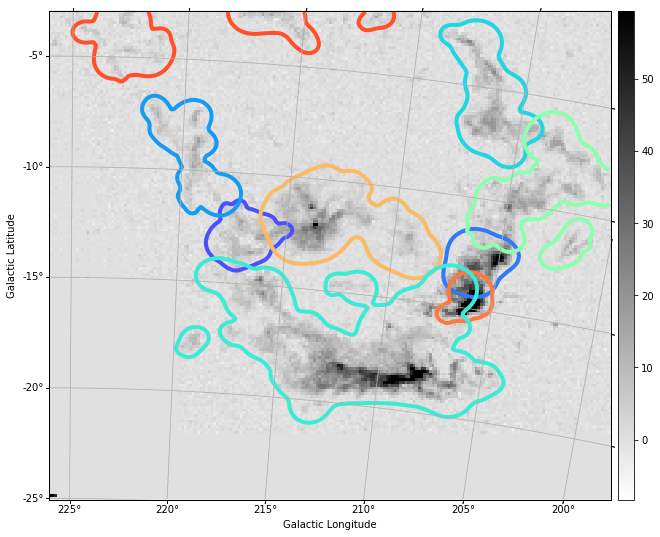

In [68]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[873], sd[854], sd[872], sd[857], sd[862], sd[881]], wcs=wcs)

In [69]:
htree[873]

(860, 861)

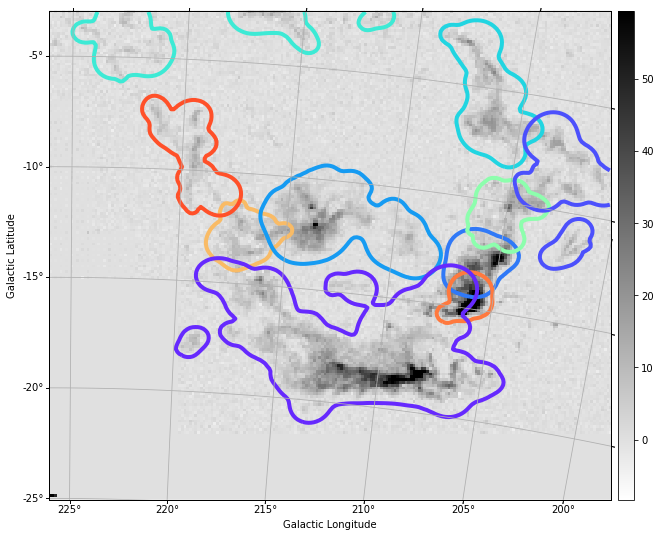

In [70]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[861], sd[854], sd[872], sd[857], sd[862], sd[881]], wcs=wcs)

In [71]:
htree[872]

(851, 864)

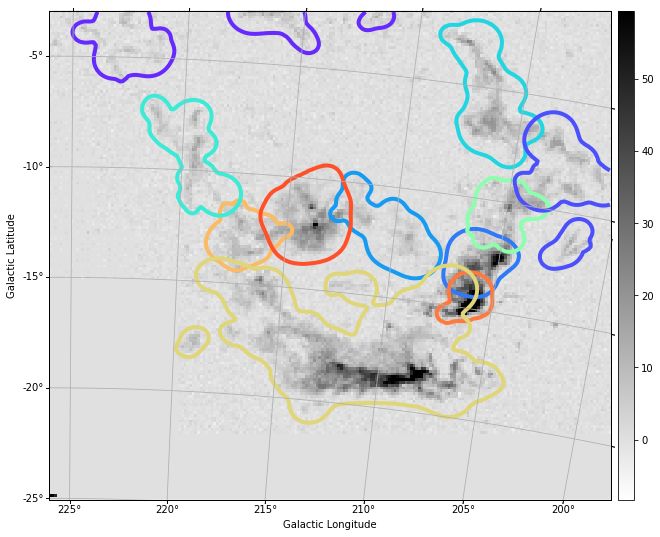

In [72]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[861], sd[854], 
                   sd[851], sd[864], sd[857], sd[862], sd[881]], wcs=wcs)

In [83]:
htree[862]

(827, 843)

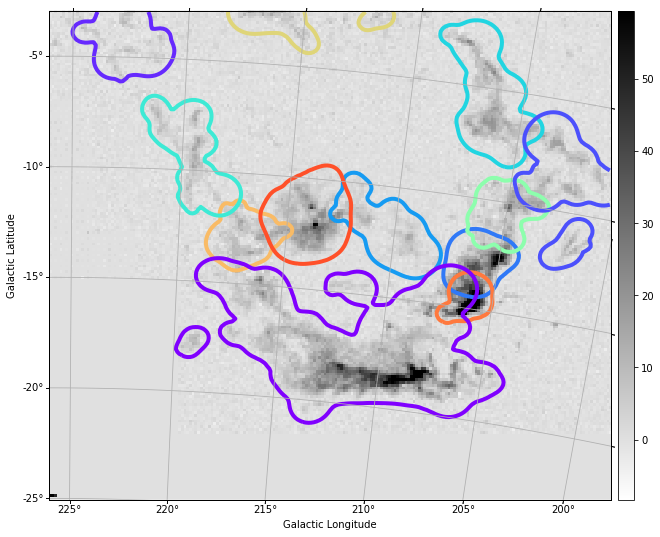

In [84]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[861], sd[854], 
                   sd[851], sd[864], sd[857], sd[827], sd[843], sd[881]], wcs=wcs)

In [85]:
htree[843]

(671, 793)

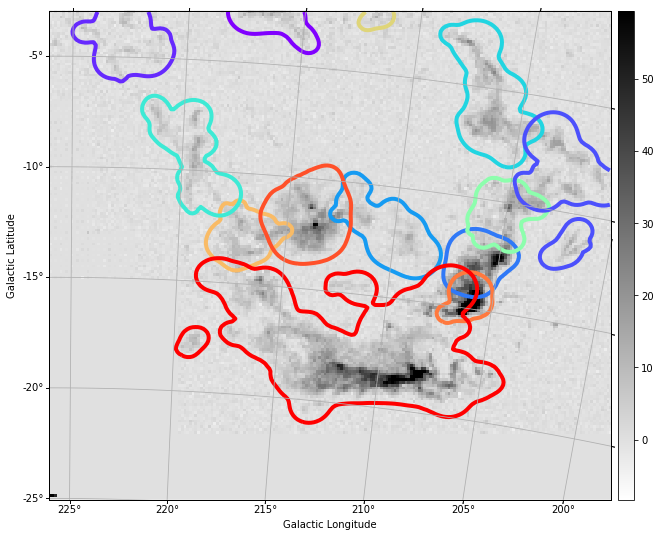

In [86]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[861], sd[854], 
                   sd[851], sd[864], sd[857], sd[827], sd[671], sd[793], sd[881]], wcs=wcs)

In [87]:
htree[861]

(804, 855)

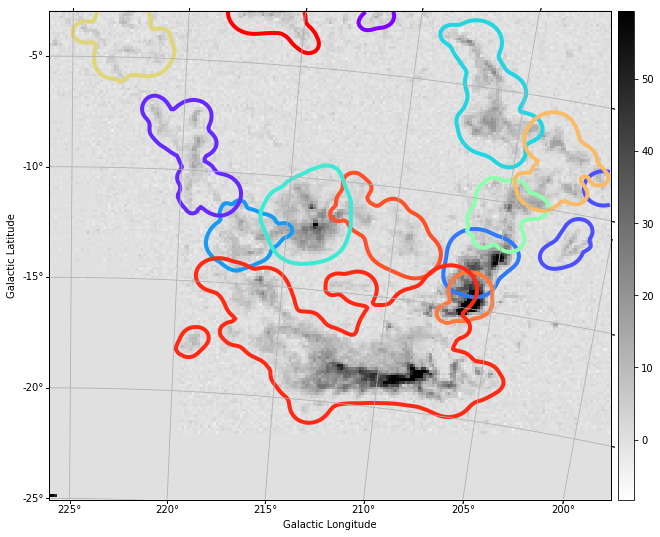

In [88]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[804], sd[855], sd[854], 
                   sd[851], sd[864], sd[857], sd[827], sd[671], sd[793], sd[881]], wcs=wcs)

In [89]:
htree[855]

(830, 832)

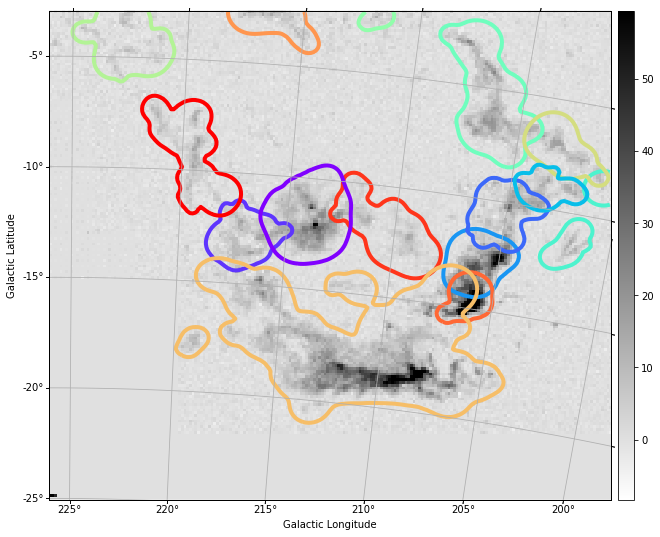

In [92]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[804], sd[830], sd[832], sd[854], 
                   sd[851], sd[864], sd[857], sd[827], sd[671], sd[793], sd[881]], wcs=wcs)